In [35]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def preprocesar_imagen(image_path):
    # Cargar la imagen
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"No se pudo cargar la imagen: {image_path}")

    # Convertir a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Aplicar desenfoque para reducir el ruido
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Detectar bordes con Canny
    edges = cv2.Canny(blurred, 50, 150)
    
    # Dilatar los bordes para cerrar huecos
    dilated = cv2.dilate(edges, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)), iterations=3)
    
    return image, dilated

In [37]:
def encontrar_viñetas(image, edges):
    # Encontrar contornos
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filtrar contornos por área y aspecto
    viñetas = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        if 0.5 < aspect_ratio < 2.0 and cv2.contourArea(contour) > 1000:  # Ajusta estos valores según sea necesario
            viñetas.append((x, y, w, h))
    
    return viñetas

In [38]:
def dibujar_y_guardar_viñetas(image, viñetas, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for i, (x, y, w, h) in enumerate(viñetas):
        # Imprimir las coordenadas de los bordes detectados
        print(f"Viñeta {i}: x={x}, y={y}, w={w}, h={h}")
        
        # Extraer y guardar la viñeta
        viñeta = image[y:y+h, x:x+w]
        cv2.imwrite(f"{output_folder}/viñeta_{i}.jpg", viñeta)
        
        # Dibujar rectángulo en la imagen original
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Convertir la imagen de BGR a RGB para matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Mostrar la imagen con los rectángulos dibujados usando matplotlib
    plt.imshow(image_rgb)
    plt.title('Viñetas detectadas')
    plt.axis('off')  # Ocultar los ejes
    plt.show()

Viñeta 0: x=1514, y=12214, w=86, h=122
Viñeta 1: x=0, y=11691, w=1600, h=1998
Viñeta 2: x=426, y=11459, w=772, h=590
Viñeta 3: x=356, y=10644, w=37, h=42
Viñeta 4: x=177, y=9408, w=1084, h=1289
Viñeta 5: x=0, y=8439, w=49, h=53
Viñeta 6: x=1385, y=8314, w=215, h=206
Viñeta 7: x=0, y=8302, w=102, h=112
Viñeta 8: x=0, y=8262, w=57, h=49
Viñeta 9: x=1380, y=8257, w=220, h=191
Viñeta 10: x=1391, y=8183, w=209, h=174
Viñeta 11: x=1467, y=8130, w=133, h=83
Viñeta 12: x=681, y=8075, w=240, h=130
Viñeta 13: x=0, y=8070, w=99, h=58
Viñeta 14: x=1443, y=7456, w=157, h=79
Viñeta 15: x=1526, y=7428, w=74, h=41
Viñeta 16: x=1459, y=7357, w=141, h=78
Viñeta 17: x=0, y=7241, w=122, h=90
Viñeta 18: x=1492, y=7237, w=108, h=77
Viñeta 19: x=1518, y=7066, w=82, h=76
Viñeta 20: x=0, y=7052, w=128, h=125
Viñeta 21: x=1487, y=6962, w=113, h=116
Viñeta 22: x=0, y=6947, w=92, h=104
Viñeta 23: x=0, y=6831, w=1600, h=1826
Viñeta 24: x=160, y=4432, w=1440, h=1942
Viñeta 25: x=836, y=3873, w=165, h=89
Viñeta 26: 

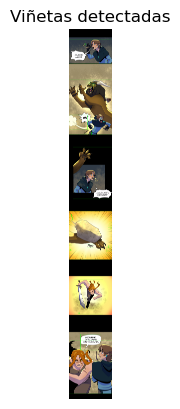

In [39]:
# Ruta de la imagen de cómic
image_path = 'data/input/Comic6_010.jpg'
output_folder = 'data/output/viñetas'

# Preprocesar la imagen
image, edges = preprocesar_imagen(image_path)

# Encontrar viñetas
viñetas = encontrar_viñetas(image, edges)

# Dibujar y guardar viñetas
dibujar_y_guardar_viñetas(image, viñetas, output_folder)